In [4]:
from pathlib import Path
from typing import List

import pandas as pd
from artifact_core.libs.resource_spec.tabular.spec import TabularDataSpec
from artifact_experiment.table_comparison.validation_plan import (
    TableComparisonArrayCollectionType,
    TableComparisonArrayType,
    TableComparisonPlotCollectionType,
    TableComparisonPlotType,
    TableComparisonScoreCollectionType,
    TableComparisonScoreType,
    TableComparisonValidationPlan,
)

In [2]:
class MyValidationPlan(TableComparisonValidationPlan):
    @staticmethod
    def _get_score_types() -> List[TableComparisonScoreType]:
        return [TableComparisonScoreType.MEAN_JS_DISTANCE]

    @staticmethod
    def _get_array_types() -> List[TableComparisonArrayType]:
        return []

    @staticmethod
    def _get_plot_types() -> List[TableComparisonPlotType]:
        return [
            TableComparisonPlotType.PDF_PLOT,
            TableComparisonPlotType.CDF_PLOT,
            TableComparisonPlotType.DESCRIPTIVE_STATS_COMPARISON_PLOT,
            TableComparisonPlotType.PCA_PROJECTION_PLOT,
            TableComparisonPlotType.TSNE_PROJECTION_PLOT,
        ]

    @staticmethod
    def _get_score_collection_types() -> List[TableComparisonScoreCollectionType]:
        return [TableComparisonScoreCollectionType.JS_DISTANCE]

    @staticmethod
    def _get_array_collection_types() -> List[TableComparisonArrayCollectionType]:
        return []

    @staticmethod
    def _get_plot_collection_types() -> List[TableComparisonPlotCollectionType]:
        return []


In [5]:
artifact_core_root = Path().absolute().parent

df_real = pd.read_csv(artifact_core_root / "assets/real.csv")
df_synthetic = pd.read_csv(artifact_core_root / "assets/synthetic.csv")

In [6]:
ls_cts_features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

resource_spec = TabularDataSpec.from_df(
    df=df_real,
    ls_cts_features=ls_cts_features,
    ls_cat_features=[feature for feature in df_real.columns if feature not in ls_cts_features],
)

In [7]:
plan = MyValidationPlan.build(resource_spec=resource_spec)

In [8]:
plan.execute(dataset_real=df_real, dataset_synthetic=df_synthetic)

c:\Users\hecto\Codebase\artifact-ml\artifact-experiment\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\hecto\Codebase\artifact-ml\artifact-experiment\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


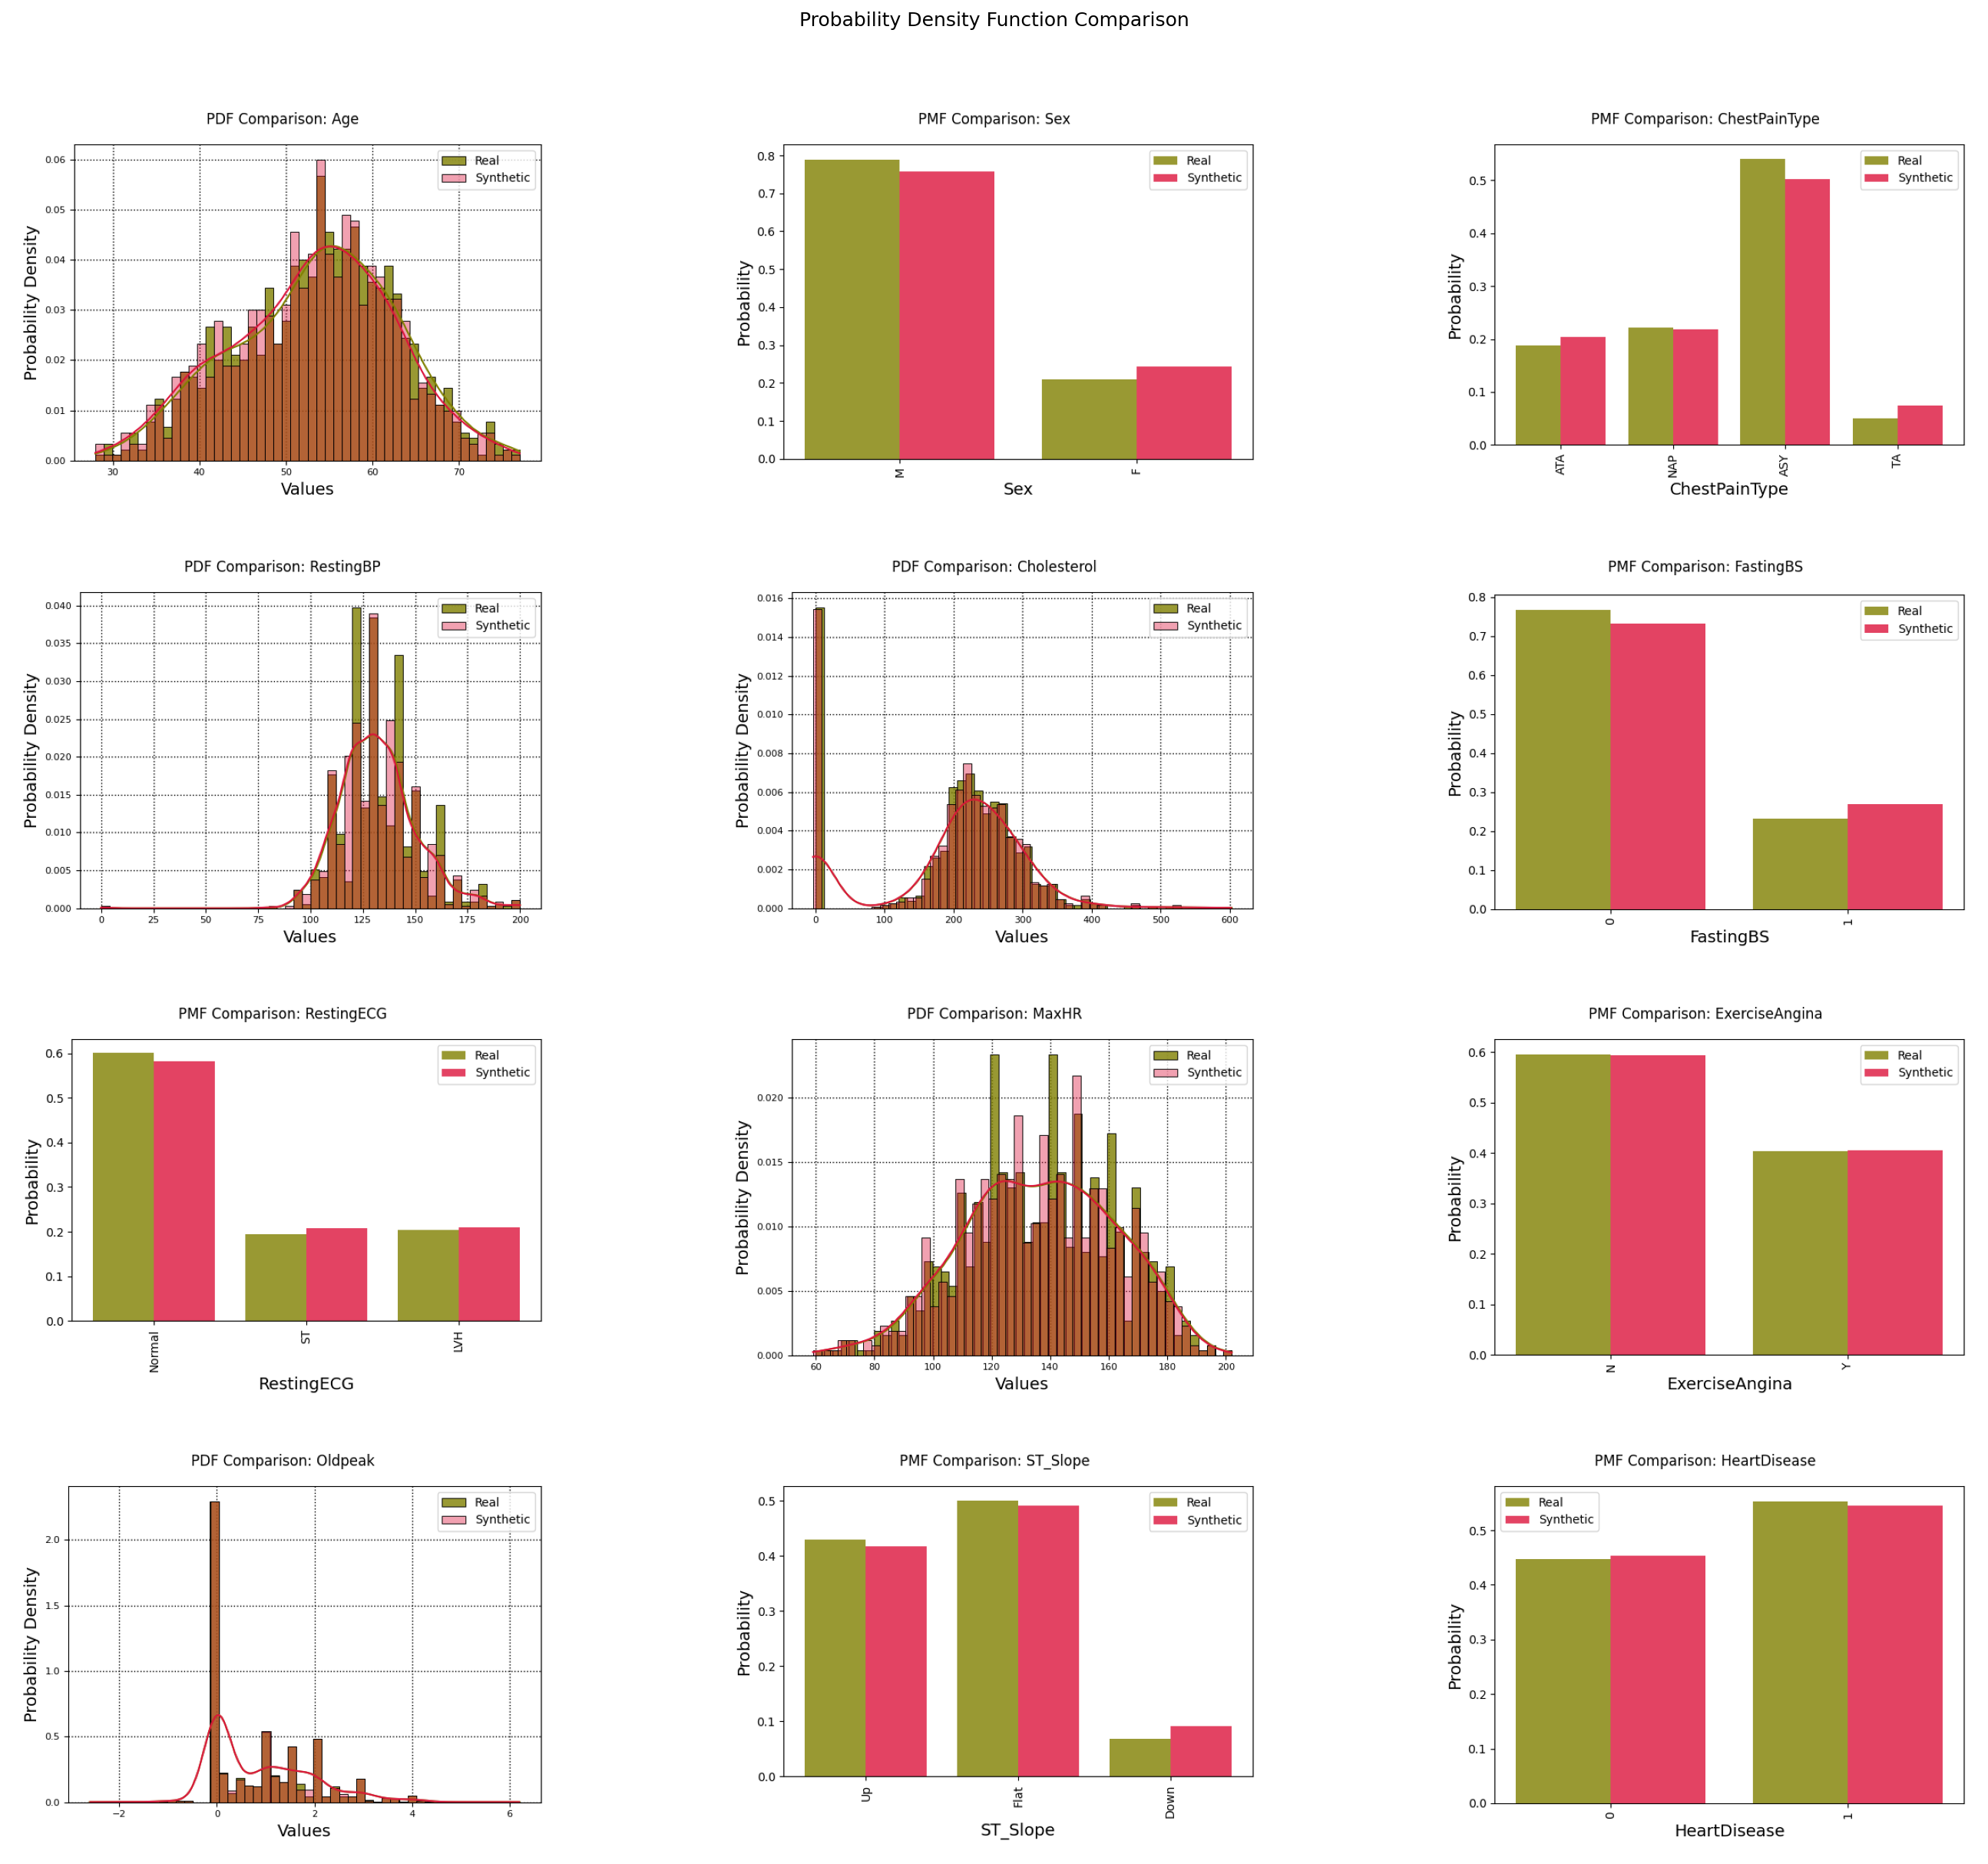

In [12]:
plan.plots["PDF_PLOT"]